In [231]:

# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import pandas as pd
from keras.layers import LSTM,Bidirectional,Input,Dense,Activation,Dropout,Flatten, Dot
from keras.models import Model
import tensorflow as tf
from sklearn.model_selection import train_test_split 

In [232]:
from tensorflow.keras.models import Sequential

In [233]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [234]:
from tensorflow.keras.layers import Dropout

from keras.utils import to_categorical
import tensorflow as tf

In [235]:
data1 = pd.read_csv("/media/nbm/2D08-2980/ICT4D/Historical_code/Again.csv")

In [165]:
data1

,Age,Gender,Marital_Status,Job,Education,Work_Experience,Type_of_Loan,Annual_Income,Coapplicant_Income,Total_Income,Duration_of_Loan,A,Loan_History,Loan_Grade,Amount_of_Loan,Loan_int_rate,Loan_Status
0,22,0,1,0,1,3,0,59000,11500,70500,180,0,1,3,35000,16.02,1
1,21,0,0,1,0,5,1,9600,3000,12600,300,0,2,1,1000,11.14,0
2,25,0,0,0,1,1,1,9600,16500,26100,300,0,3,2,5500,12.87,1
3,23,0,0,2,0,4,1,65500,16425,81925,300,0,3,2,35000,15.23,1
4,24,1,1,3,0,8,2,54400,16400,70800,144,0,3,2,35000,14.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,26,1,0,0,0,0,3,47000,2500,49500,60,0,3,0,16500,6.92,1
5996,23,0,1,0,2,5,1,47000,2500,49500,60,0,4,1,16500,10.62,1
5997,22,0,1,0,2,6,1,48000,3250,51250,60,0,3,0,16500,8.90,1
5998,25,0,1,0,1,2,3,25000,2500,27500,120,0,4,0,1500,6.76,0


In [166]:
data = data1.drop(columns=['Loan_Status'])

In [167]:
x = data1.iloc[:, :-1].values
print(x)

[[2.200e+01 0.000e+00 1.000e+00 ... 3.000e+00 3.500e+04 1.602e+01]
 [2.100e+01 0.000e+00 0.000e+00 ... 1.000e+00 1.000e+03 1.114e+01]
 [2.500e+01 0.000e+00 0.000e+00 ... 2.000e+00 5.500e+03 1.287e+01]
 ...
 [2.200e+01 0.000e+00 1.000e+00 ... 0.000e+00 1.650e+04 8.900e+00]
 [2.500e+01 0.000e+00 1.000e+00 ... 0.000e+00 1.500e+03 6.760e+00]
 [2.500e+01 1.000e+00 0.000e+00 ... 3.000e+00 1.650e+04 1.280e+01]]


In [168]:
data=x

In [169]:
y = data1.iloc[:, -1].values
print(y)

[1 0 1 ... 1 0 1]


In [170]:
y.shape

(6000,)

In [171]:
data.shape

(6000, 16)

In [172]:
datay=pd.read_csv('/media/nbm/2D08-2980/ICT4D/Historical_code/Again.csv',index_col='Loan_Status')

In [173]:
datay

,Age,Gender,Marital_Status,Job,Education,Work_Experience,Type_of_Loan,Annual_Income,Coapplicant_Income,Total_Income,Duration_of_Loan,A,Loan_History,Loan_Grade,Amount_of_Loan,Loan_int_rate
Loan_Status,,,,,,,,,,,,,,,,
1,22,0,1,0,1,3,0,59000,11500,70500,180,0,1,3,35000,16.02
0,21,0,0,1,0,5,1,9600,3000,12600,300,0,2,1,1000,11.14
1,25,0,0,0,1,1,1,9600,16500,26100,300,0,3,2,5500,12.87
1,23,0,0,2,0,4,1,65500,16425,81925,300,0,3,2,35000,15.23
1,24,1,1,3,0,8,2,54400,16400,70800,144,0,3,2,35000,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,26,1,0,0,0,0,3,47000,2500,49500,60,0,3,0,16500,6.92
1,23,0,1,0,2,5,1,47000,2500,49500,60,0,4,1,16500,10.62
1,22,0,1,0,2,6,1,48000,3250,51250,60,0,3,0,16500,8.90


In [174]:
x_train_r=data.reshape(data.shape[0], 1, data.shape[1]) 

In [175]:
x_train_r.shape

(6000, 1, 16)

In [176]:
n_timesteps,n_features=x_train_r.shape[1],x_train_r.shape[2]

In [177]:
print(n_features)

16


In [179]:
trainy = to_categorical(y)

In [180]:
trainy

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x_train_r, trainy, test_size=0.2)

In [182]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [26]:
n_outputs=2

In [27]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.MaxPool1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-06-24 14:46:44.960388: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [278]:
#LSTM
input_shape=(n_timesteps,n_features)
input_data = tf.keras.layers.Input(name='input', shape=input_shape, dtype='float32')
lstm = tf.keras.layers.LSTM(128, return_sequences=False, return_state=False)(input_data)
fc = Flatten()(lstm) 
outputs = Dense(n_outputs, activation='softmax')(fc)


In [279]:
model_lstm = tf.keras.models.Model(input_data, outputs)

In [280]:
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [281]:
his=model_lstm.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
300/300 [==============================] - 1s 1ms/step - loss: 0.6567 - accuracy: 0.6304
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6519
Epoch 3/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5754
Epoch 4/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5296
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5242
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5450
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5446
Epoch 8/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5375
Epoch 9/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5344
Epoch 10/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5396

In [273]:
acc=model_lstm.evaluate(x_test, y_test, batch_size=32)

38/38 [==============================] - 0s 690us/step - loss: 0.6762 - accuracy: 0.5400


In [183]:
input_shape=(n_timesteps, n_features)

input_data = tf.keras.layers.Input(shape=input_shape, dtype='float32')
inner1 = tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu')(input_data)
inner2 = tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu')(inner1)
# inner3 = Dropout(0.25)(inner2)
# inner4 = tf.keras.layers.MaxPool1D(pool_size=1)(inner3)
inner5 = Flatten()(inner2)
dense1 = Dense(100, activation='relu')(inner5)

out = Dense(n_outputs, activation='relu')(dense1)


In [184]:
model_cnn = tf.keras.models.Model(input_data, out)

In [185]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [186]:
model_cnn.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 1, 16)]           0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 1, 32)             544       
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 1, 32)             1056      
_________________________________________________________________
flatten_16 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 202       
Total params: 5,102
Trainable params: 5,102
Non-trainable params: 0
________________________________________________________

In [188]:
his=model_cnn.fit(x_train, y_train, epochs=15, batch_size=16) # 1Dcnn+fc

Epoch 1/15
300/300 [==============================] - 0s 661us/step - loss: 0.5922 - accuracy: 0.6044
Epoch 2/15
300/300 [==============================] - 0s 660us/step - loss: 0.5427 - accuracy: 0.7887
Epoch 3/15
300/300 [==============================] - 0s 650us/step - loss: 0.4673 - accuracy: 0.7983
Epoch 4/15
300/300 [==============================] - 0s 712us/step - loss: 0.4447 - accuracy: 0.8073
Epoch 5/15
300/300 [==============================] - 0s 650us/step - loss: 0.4632 - accuracy: 0.8100
Epoch 6/15
300/300 [==============================] - 0s 714us/step - loss: 0.4507 - accuracy: 0.8129
Epoch 7/15
300/300 [==============================] - 0s 703us/step - loss: 0.4465 - accuracy: 0.8090
Epoch 8/15
300/300 [==============================] - 0s 691us/step - loss: 0.5299 - accuracy: 0.7840
Epoch 9/15
300/300 [==============================] - 0s 731us/step - loss: 0.5049 - accuracy: 0.8017
Epoch 10/15
300/300 [==============================] - 0s 694us/step - loss: 0.457

In [190]:
feature = tf.keras.models.Model(inputs=model_cnn.input,outputs=model_cnn.get_layer('flatten_16').output)

In [191]:
x_train_new = feature.predict(x_train) #featurs extracted from already trained 1dcnn
print(x_train_new.shape)

x_test_new = feature.predict(x_test)
print(x_test_new.shape)


(4800, 32)
(1200, 32)


In [282]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
model_rnd = RandomForestClassifier(n_estimators=100)


In [292]:
model_rnd.fit(x_train_new, np.argmax(y_train, axis=1))
y_pred=model_rnd.predict(x_test_new)

In [298]:
np.argmax(y_test, axis=1)[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [299]:
y_pred[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [294]:
print("Accuracy:",accuracy_score(np.argmax(y_test,axis=1), y_pred))

Accuracy: 1.0


In [203]:
#svm classification
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')

model_svm.fit(x_train_new, np.argmax(y_train,axis=1))

SVC()

In [204]:
svm

SVC()

In [205]:
svm.score(x_test_new,np.argmax(y_test,axis=1))
Pred_labels = svm.predict(x_test_new)

In [206]:
Pred_labels[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [207]:
np.argmax(y_test,axis=1)[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [211]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
#print (classification_report(np.argmax(y_test, axis=1),svm))

print("Accuracy:{0}".format(accuracy_score(np.argmax(y_test,axis=1),Pred_labels)))

Accuracy:0.8325


In [212]:
acc=model_cnn.evaluate(x_test, y_test, batch_size=32)

38/38 [==============================] - 0s 651us/step - loss: 0.4228 - accuracy: 0.8283


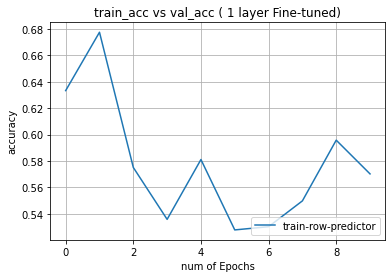

In [32]:
trr_acc = his.history['accuracy']
valr_acc = his.history['val_accuracy']
epochs=range(10)


# to print training  accuracy vs validation accuracy
plt.plot(epochs, trr_acc)
#plt.plot(epochs, valr_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc ( 1 layer Fine-tuned)')
plt.grid(True)
plt.legend(['train-row-predictor', 'val-row-predictor','train-column-predictor', 'val-column-predictor'], loc=4)
plt.show()

In [33]:
pred = model.predict(x_train_r[5000:])

In [34]:
import numpy as np

In [35]:
# model_0 fine tune
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = pred.argmax(axis=-1)
y_true = [np.argmax(p) for p in trainy[5000:]]
#finetune 1
print(classification_report(y_true, y_pred))
matrix = confusion_matrix(y_true, y_pred)
acceach1=matrix.diagonal()/matrix.sum(axis=1)

              precision    recall  f1-score   support

           0       0.56      0.99      0.72       496
           1       0.95      0.25      0.39       504

    accuracy                           0.61      1000
   macro avg       0.76      0.62      0.56      1000
weighted avg       0.76      0.61      0.55      1000



In [36]:
print(matrix)

[[490   6]
 [379 125]]


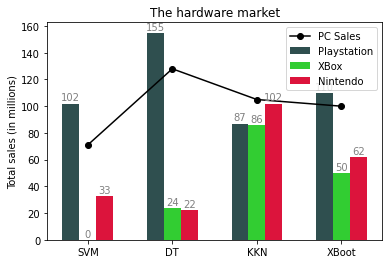

In [38]:
import  matplotlib.pyplot as plt

def autolabel(rectangle_group):
	for rect in rectangle_group:
		height = rect.get_height()

		ax.annotate(str(height),
			xy = (rect.get_x() + rect.get_width() / 2,height),
			ha = 'center',
			xytext = (0,3),textcoords = 'offset points',
			color = 'grey')
        

phases      = ['SVM','DT','KKN','XBoot']
playstation = [102      , 155      , 87     , 110       ]
xbox        = [0        , 24       , 86     , 50        ]
nintendo    = [33       , 22       , 102    , 62        ]
pc_sales    = [71       , 128      , 105    , 100      ]

# MSE = [102      , 155      , 87     , 110       ]
# MAE        = [0        , 24       , 86     , 50        ]
# RMSE    = [33       , 22       , 102    , 62        ]
# R2    = [71       , 128      , 240    , 316       ]


width = 0.2
x_playstation = [x - width for x in range(len(playstation))]
x_xbox        = [x for x in range(len(xbox))]
x_nintendo = [x + width for x in range(len(nintendo))]

fig,ax = plt.subplots()

rect1 = ax.bar(x_playstation, playstation,width, label = 'Playstation',color = 'darkslategray')
rect2 = ax.bar(x_xbox,xbox,width,label = 'XBox',color = 'limegreen')
rect3 = ax.bar(x_nintendo,nintendo,width,label = 'Nintendo',color = 'crimson')
ax.plot(phases,pc_sales,label = 'PC Sales',color = 'black',marker = 'o')

ax.set_title('The hardware market')
ax.set_ylabel('Total sales (in millions)')
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.show()

In [ ]:
#LSTM
input_shape=(n_timesteps, n_features)
input_data = tf.keras.layers.Input(name='input', shape=input_shape, dtype='float32')
lstm = tf.keras.layers.LSTM(128, return_sequences=False, return_state=False)(input_data)
fc = Flatten()(lstm) 
outputs = Dense(n_outputs, activation='softmax')(fc)


In [310]:
input_data = tf.keras.layers.Input(shape=input_shape, dtype='float32')
inner1 = tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu')(input_data)
inner2 = tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu')(inner1)
lstm = tf.keras.layers.LSTM(128, return_sequences=False, return_state=False)(inner2)
fc = Flatten()(lstm) 
outputs = Dense(n_outputs, activation='softmax')(fc)

In [314]:
model_cnn_lstm.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 1, 16)]           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 1, 32)             544       
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 1, 32)             1056      
_________________________________________________________________
lstm_31 (LSTM)               (None, 128)               82432     
_________________________________________________________________
flatten_36 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 258       
Total params: 84,290
Trainable params: 84,290
Non-trainable params: 0
______________________________________________________

In [311]:
model_cnn_lstm = tf.keras.models.Model(input_data, outputs)

In [312]:
model_cnn_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [313]:
his=model_cnn_lstm.fit(x_train, y_train, epochs=15, batch_size=16)

Epoch 1/15
300/300 [==============================] - 2s 1ms/step - loss: 0.6653 - accuracy: 0.6081
Epoch 2/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6879
Epoch 3/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.6456
Epoch 4/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6290
Epoch 5/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5867
Epoch 6/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5908
Epoch 7/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5569
Epoch 8/15
300/300 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5206
Epoch 9/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5129
Epoch 10/15
300/300 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5227